In [1]:
import discretisedfield as df

In [2]:
p1 = (-1000e-9, -1000e-9, 0.0)
p2 = (1000e-9, 1000e-9, 1e-9)
cell = (1e-9, 1e-9, 1e-9)

mesh = df.Mesh(p1=p1, p2=p2, cell=cell)

In [3]:
mesh.n

(2000, 2000, 1)

In [4]:
def disk(point, res):
    x, y, z = point
    if x**2 + y**2 <= (1000e-9) ** 2:
        res[:] = 1.0
    else:
        res[:] = 0.0


def M_init(point, res):
    x, y, z = point
    if x**2 + y**2 <= (500e-9) ** 2:
        res[:] = [0.0, 0.0, -1.0]
    else:
        res[:] = [0.0, 0.0, 1.0]

In [5]:
%%time
field = df.Field(mesh=mesh, dim=3, value=M_init, norm=disk)

CPU times: user 2.09 s, sys: 204 ms, total: 2.29 s
Wall time: 2.32 s


/Users/swapneel/opt/miniconda3/envs/ubermagdev/lib/python3.8/site-packages/matplotlib/quiver.py:651: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/swapneel/opt/miniconda3/envs/ubermagdev/lib/python3.8/site-packages/matplotlib/quiver.py:651: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


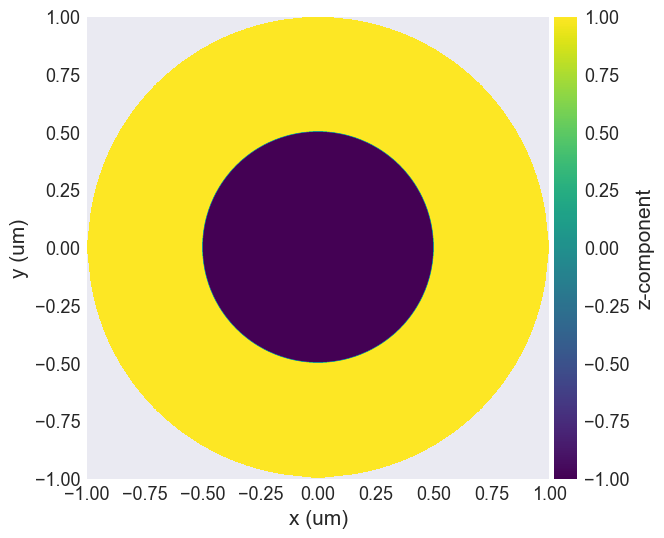

In [6]:
field.plane("z").mpl()